# Assignment 4: Optimizing Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In this assignment, you will continue practicing the fourth step of the machine learning life cycle and train logistic regression models that will be used to solve a classification problem.  You will build many variants, each one with a different value of the $C$ hyperparameter, which governs the amount of regularization used. Regularization is a process where we add a "penalty" to the original log loss function. This penalty is a function of the magnitudes of the weights learned in the Logistic Regression. The following shows the regularized log loss using what is called "L2" regularization.<br><br> 

<center>$Regularized \ LogLoss = -\frac{1}{N} \sum\limits_{i=1}^N (y_ilog(P_i)+(1-y_i)log(1-P_i))+\frac{1}{C} \sum\limits_{j=1}^m w_j^2$</center><br><br>


With L2 regularization, the penalty is the sum of the squares of the weights scaled by a constant $1/C$. When the hyperparameter $C$ is large, we reduce the weight of the penalty, which results in less regularization. You will build Logistic regressions with different values of $C$ and will check how this impacts the log loss.


You will complete the following tasks:

1. Build your DataFrame and define your ML problem:
    * Load the "cell2cell" data set into a DataFrame
    * Define the label - what are you predicting?
    * Identify features
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Train logistic regression classifiers and evaluate their performances:
    * Fit logistic regression models to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of each model's predictions
    * Plot and analyize the resulting log loss and accuracy scores

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set has been preprocessed and is ready for modeling.

In [2]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [5]:
df = pd.read_csv(filename)

#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

To implement a Logistic Regression model, we must use only the numeric columns. 


<b>Task</b>: Use the Pandas DataFrame <code>select_dtypes()</code> method to obtain all of names of columns that have a dtype of "float64." Save the result to a list named `feature_list`. 

In [32]:
feature_list = df.select_dtypes(include=['float64']).columns.tolist()

## Part 2. Create Labeled Examples from the Data Set 

Our data is fully prepared for modeling. We can now create labeled examples from DataFrame `df`.

<b>Task</b>: Obtain the feature columns from DataFrame `df` and assign to `X`. Obtain the label column from DataFrame `df` and assign to `y`.

You should have 51047 labeled examples. Each example contains 35 features and one label.

In [34]:
X = df[feature_list]
y = df['Churn']
X

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,-0.782676,-0.578738,-1.041153,-0.289532,-0.414422,-0.125914,-0.564836,-0.449987,-0.587303,-0.309284,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.128300,-0.169283,-0.103411,-0.140707,-0.864858
1,-0.940180,-0.973177,-1.250809,-0.401714,-0.414422,-0.125914,0.029311,0.030120,-0.631532,-0.373230,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.128300,-0.169283,0.215243,-0.140707,-0.864858
2,-0.468118,-0.976952,-0.370255,-0.401714,-0.414422,-0.125914,0.037077,0.030120,-0.664703,-0.373230,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.368174
3,0.526784,1.484048,1.181196,0.154708,-0.414422,-0.125914,0.654524,0.234797,4.012499,0.330172,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-1.195980
4,-0.936810,-0.992050,-1.250809,-0.401714,-0.414422,-0.125914,0.044844,0.025066,-0.664703,-0.373230,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-1.195980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,0.363618,-0.126582,...,0.487071,0.573107,1.659328,1.790800,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.368174
51043,0.816402,2.301236,1.600507,0.042526,0.051479,0.352789,0.518608,0.431894,1.181852,-0.309284,...,0.487071,0.328819,0.754122,1.122214,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-0.368174
51044,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,4.012499,0.019579,...,0.487071,-0.010031,0.210998,-0.883541,-0.180167,-0.128300,-0.169283,0.852549,2.469282,-0.037051
51045,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,-0.664703,-0.373230,...,0.487071,0.206676,0.029957,-0.883541,-0.180167,-0.128300,-0.169283,1.489856,-0.140707,-0.864858


## Part 3. Create Training and Test Data Sets

<b>Task</b>: Create training and test data sets out of the labeled examples. Save the results to variables `X_train, X_test, y_train, y_test`.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

<b>Task</b>: Check the dimensions of the training and test data sets.

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34201, 35) (16846, 35) (34201,) (16846,)


## Part 4. Train a Logistic Regression Classifier and Evaluate the Model

The code cell below contains a function definition `train_test_LR()`. 

Inspect the function definition `train_test_LR(X_train, X_test, y_train, y_test, c=1)`. The function expects the training and test data sets, as well as a value for hyperparameter $C$. Note that we supplied the value of 1 for $C$ by default.

<b>Task:</b> Complete the function to make it work.

This function should:
1. train a Logistic Regression model on the training data
2. test the resulting model on the test data
3. compute and return two items:
    * the log loss of the resulting probability predictions on the test data 
    * the accuracy score of the resulting predicted class labels on the test data


You will use the scikit-learn [```LogisticRegression``` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and will provide the arguments `C=c` when creating the model object.




In [37]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)
    log_loss_value = log_loss(y_test, y_prob)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    return log_loss_value, acc_score

### Train a Model and Analyze the Results

<b>Task:</b> Use your function `train_test_LR()` to train one Logistic Regression classifier with the default value of hyperparameter C (`c=1`). Print the resulting log loss and accuracy score.

In [38]:
log_loss_value, acc_score = train_test_LR(X_train, y_train, X_test, y_test, c=1)
print(log_loss_value, acc_score)

0.5878612157234173 0.7097827377418972


## Part 5. Train on Different Hyperparameter Values and Analyze the Results

Now we will adjust the $C$ regularization hyperparameter to check its impact on the model's log loss and accuracy. Hyperparameter `C` stands for the inverse of regularization strength. Smaller values specify stronger regularization and a simpler model. Larger values specify weaker regularization and a more complex model.<br>

The code cell below creates a list `cs` of twenty values of $C$.  Every item in the list has a value $10^i$ for every integer $i$ in the output of `range(-10,10)`. Run the code cell below and inspect the different values of $C$.

In [39]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

<b>Task</b>: In the code cell below, loop over list `cs` and train and evaluate a different Logistic Regression model for every value of $C$. Use your function `train_test_LR()`. Print the resulting log loss and accuracy scores per model.

We will want to create visualizations that plot the resulting log loss and accuracy score for every value of hyperparameter $C$. Considering this, save the resulting log loss values and accuracy scores that your function returns to two different lists. You will use these lists to create plots later.

In [40]:
log_loss_result = []
acc_score_result = []
for c in cs:
    log_loss_value, acc_score = train_test_LR(X_train, y_train, X_test, y_test, c=c)
    log_loss_result.append(log_loss_value)
    acc_score_result.append(acc_score)
    print(log_loss_value, acc_score)


0.6019882218839937 0.710198266650837
0.6019879879688643 0.710198266650837
0.6019856457586286 0.710198266650837
0.6019623116656803 0.710198266650837
0.6017368944992653 0.710198266650837
0.6000102566181061 0.710198266650837
0.5939550491932645 0.710198266650837
0.5882530046237049 0.7104950730143654
0.5876588226394373 0.7099014602873086
0.587835892808505 0.7099014602873086
0.5878612157234173 0.7097827377418972
0.5878648343540094 0.7098420990146028
0.5878651012583729 0.7098420990146028
0.5878651279496574 0.7098420990146028
0.5878651306188116 0.7098420990146028
0.587865130885716 0.7098420990146028
0.5878651309124132 0.7098420990146028
0.5878651309150807 0.7098420990146028
0.587865130915354 0.7098420990146028
0.5878651309153761 0.7098420990146028


Now let's visualize the results. 

Before we create plots, let's reformat the hyperparameter values in list `cs` so that they can be easily visualized in our plots. We will take the log 10 of the hyperparameter values and save it to a new list called `cs_log10`. Let's take a look at the original values and transformed values:
 

In [41]:
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]



#### Plot Log Loss

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting log loss for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the log loss should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

<AxesSubplot:>

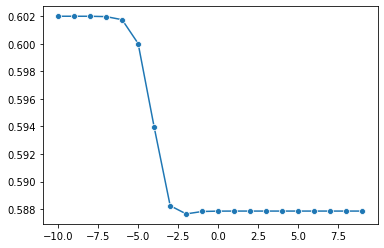

In [43]:
sns.lineplot(x=cs_log10, y=log_loss_result, marker='o')

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of loss?

Best transformed C value: -2.0
C value = 0.01

#### Plot Accuracy

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting accuracy score for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the accuracy score should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

<AxesSubplot:>

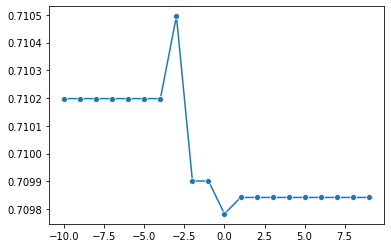

In [46]:
sns.lineplot(x=cs_log10, y=acc_score_result, marker='o')

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of accuracy?

Best transformed C value: -3.0
C value = 0.001